In [0]:
# Импорт библиотек
import numpy as np
import pandas as pd


In [0]:
# Импорт matplotlib - не нужен, на всякий случай

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
# Импорт нужного из keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
# Импорт обучающей выборки
wine = pd.read_csv('Wine.txt', sep='\t', header=0)


In [6]:
wine.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [7]:
wine['Desired1(3)'].value_counts(normalize=True)

2    0.398876
0    0.331461
1    0.269663
Name: Desired1(3), dtype: float64

In [0]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = wine['Desired1(3)']
# Предикторы - таблица X
X = wine.drop('Desired1(3)', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345,
                                                    # доля объёма тестового множества
                                                    test_size=0.33)

In [12]:
X_train.head(), X_test.head(), y_train.head(), y_test.head()




(    Input1  Input2  Input3  Input4  ...  Input10  Input11  Input12  Input13
 47   13.90    1.68    2.12    16.0  ...     6.10     0.91     3.33      985
 73   12.99    1.67    2.60    30.0  ...     3.35     1.31     3.50      985
 79   12.70    3.87    2.40    23.0  ...     2.57     1.19     3.13      463
 8    14.83    1.64    2.17    14.0  ...     5.20     1.08     2.85     1045
 13   14.75    1.73    2.39    11.4  ...     5.40     1.25     2.73     1150
 
 [5 rows x 13 columns],
      Input1  Input2  Input3  Input4  ...  Input10  Input11  Input12  Input13
 109   11.61    1.35    2.70    20.0  ...     2.65     0.96     3.26      680
 68    13.34    0.94    2.36    17.0  ...     3.17     1.02     1.93      750
 176   13.17    2.59    2.37    20.0  ...     9.30     0.60     1.62      840
 55    13.56    1.73    2.46    20.5  ...     6.25     0.98     3.03     1120
 149   13.08    3.90    2.36    21.5  ...     9.40     0.57     1.33      550
 
 [5 rows x 13 columns],
 47    0
 73    2


In [0]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



In [0]:
# Больше 2-х классов
# Классы не упорядочены
y_train_bin = np_utils.to_categorical(y_train)

y_test_bin = np_utils.to_categorical(y_test)

In [17]:
# Почему не работает?
y_train_bin[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense


In [19]:

# Creating a model
model = Sequential()
model.add(Dense(9, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu', ))
model.add(Dense(3, activation='softmax'))


# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training a model
model.fit(X_train, y_train_bin, epochs=300, batch_size=10)


Epoch 1/300
119/119 [==============================] - 0s 2ms/step - loss: 16.2481 - accuracy: 0.2605
Epoch 2/300
119/119 [==============================] - 0s 163us/step - loss: 7.5811 - accuracy: 0.2605
Epoch 3/300
119/119 [==============================] - 0s 143us/step - loss: 2.8645 - accuracy: 0.2269
Epoch 4/300
119/119 [==============================] - 0s 136us/step - loss: 2.2973 - accuracy: 0.4286
Epoch 5/300
119/119 [==============================] - 0s 143us/step - loss: 1.6744 - accuracy: 0.4034
Epoch 6/300
119/119 [==============================] - 0s 134us/step - loss: 1.4278 - accuracy: 0.4874
Epoch 7/300
119/119 [==============================] - 0s 134us/step - loss: 1.2474 - accuracy: 0.5294
Epoch 8/300
119/119 [==============================] - 0s 159us/step - loss: 1.1615 - accuracy: 0.5546
Epoch 9/300
119/119 [==============================] - 0s 139us/step - loss: 1.1626 - accuracy: 0.5546
Epoch 10/300
119/119 [==============================] - 0s 135us/step - lo

In [20]:
# evaluate the model
scores = model.evaluate(X_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

59/59 [==============================] - 0s 559us/step

Accuracy: 88.14%


In [0]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [22]:
print(predictions[0:5])

[[4.5086380e-02 2.1333876e-03 9.5278025e-01]
 [2.0236498e-01 4.4230261e-01 3.5533237e-01]
 [3.5312065e-04 9.9961394e-01 3.3013159e-05]
 [9.5030797e-01 4.5259543e-02 4.4324733e-03]
 [1.3646382e-05 9.9976140e-01 2.2485192e-04]]


TORCH

In [0]:
import torch

In [0]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))
X_test_tensor  = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test.astype(np.int64))

In [0]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

D_in, D_out = 13, 3
H1, H2 = 30, 15

myNet = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.Sigmoid(), 
    torch.nn.Linear(H2, D_out),
    torch.nn.Softmax()
)

BATCH_SIZE = 10
NUM_EPOCHS = 1000

loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')

optimizer = torch.optim.SGD(myNet.parameters(), lr=0.0001)

Losses=list()
for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = myNet(X_batch)

        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        if iter_num % 100 == 0:
            Losses.append(running_loss / 100)
            print(running_loss / 100)
            running_loss = 0.0
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        iter_num += 1
    
    
plt.plot(Losses)
plt.show()

class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))

classes = ['0', '1', '2']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = myNet(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

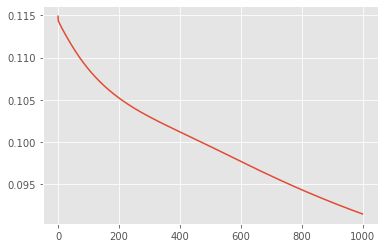

In [28]:
plt.plot(Losses)
plt.show()

In [29]:
for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 92 %
Accuracy of     1 :  0 %
Accuracy of     2 : 95 %
